In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import re

In [2]:
tdf = pd.read_csv("./HarperCollins_nearest_3_years.csv",encoding='unicode escape')
df = pd.read_csv('./HarperCollins_random_10000.csv',encoding='unicode escape')

In [4]:
originPrice = []
newPrice = []
discount = []
for index,row in df.iterrows():
    orp = row['before_discount']
    if '$' in orp:
        orp = re.sub(r'[^0-9.]', '', orp)
    else :
        orp = np.nan
    originPrice.append(orp)
    nep = row['new_price']
    if '$' in nep:
        nep = re.sub(r'[^0-9.]', '', nep)
    else :
        nep = np.nan
    newPrice.append(nep)


originPrice = pd.to_numeric(originPrice,errors='coerce')
newPrice = pd.to_numeric(newPrice,errors='coerce')
df['originalPrice'] = originPrice
df['newPrice'] = newPrice
for index,row in df.iterrows():
    if row['originalPrice']  is np.nan:
        discount.append(np.nan)
    elif row['newPrice'] is np.nan:
        discount.append(0)
    else:
        discount.append(row['newPrice']/row['originalPrice'])
   
df['discount'] = newPrice/originPrice

In [5]:
AllRank = []
DepRank = []
for index,row in df.iterrows():
    alrank = str(row['all_rank_list'])
    alrank = re.sub(r'[#,]','',alrank)
    AllRank.append(alrank)
    
AllRank = pd.to_numeric(AllRank,errors='coerce')

df['allRank'] = AllRank


In [6]:
publish_date = []
for index,row in df.iterrows():
    match = re.search('\((.*?)\)', row['other_list'])
    if match:
        publish_date.append(match.group(1))
    else:
        publish_date.append(np.nan)
df['publish_date'] = publish_date
df['publish_date'] = pd.to_datetime(df['publish_date'], format="%B %d, %Y", errors='coerce').dt.strftime("%Y-%m-%d")

In [7]:
def extractpPublisher(x):
    pattern = r'Publisher:\s*(.*?)\s*\('
    try:
        return re.search(pattern, x).group(1)
    except:
        return np.nan
df['publisher'] = df['other_list'].apply(extractpPublisher)

In [8]:
mask1 = df['format'] == 'Hardcover'
mask2 = df['format'] == 'Paperback'
backdf = df[mask2]
harddf = df[mask1]
kindledf = df[df['format'] == 'Kindle']

In [9]:
hardnewPrice = []
hardoriginPrice = []
hardlist = harddf['title'].to_list()
for index,row in kindledf.iterrows():
    title = row['title']
    if title in hardlist:
        index = hardlist.index(title)
        hardnewPrice.append(harddf.iloc[index]['newPrice'])
        hardoriginPrice.append(harddf.iloc[index]['originalPrice'])
    else:
        hardnewPrice.append(np.nan)
        hardoriginPrice.append(np.nan)
kindledf['hardSalePrice'] = hardnewPrice
kindledf['hardPrice'] = hardoriginPrice

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/4049495676.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindledf['hardSalePrice'] = hardnewPrice
/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/4049495676.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindledf['hardPrice'] = hardoriginPrice


In [10]:
papernewPrice = []
paperoriginPrice = []
paperlist = backdf['title'].to_list()
for index,row in kindledf.iterrows():
    title = row['title']
    if title in paperlist:
        index = paperlist.index(title)
        papernewPrice.append(backdf.iloc[index]['newPrice'])
        paperoriginPrice.append(backdf.iloc[index]['originalPrice'])
    else:
        papernewPrice.append(np.nan)
        paperoriginPrice.append(np.nan)
kindledf['paperSalePrice'] = papernewPrice
kindledf['paperPrice'] = paperoriginPrice

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/1106216463.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindledf['paperSalePrice'] = papernewPrice
/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/1106216463.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kindledf['paperPrice'] = paperoriginPrice


In [11]:
kindledf = kindledf.dropna(subset=['paperSalePrice','paperPrice','hardSalePrice','hardPrice'])
kindledf

,all_rank_list,format,before_discount,new_price,title,title_search_result,scrape_time,other_list,originalPrice,newPrice,discount,allRank,publish_date,publisher,hardSalePrice,hardPrice,paperSalePrice,paperPrice
6338,"#785,866",Kindle,Print List Price: $19.99 \n,$13.99\n Available instantly,The Stories of Paul Bowles,The Stories of Paul Bowles,2024-05-01 05:00:46.045735,ASIN:B003WJRDX8 Publisher:HarperCollins e-...,19.99,13.99,0.699850,785866.0,2010-12-28,HarperCollins e-books,29.95,39.95,15.99,19.99
6343,"#202,678",Kindle,Digital List Price: $19.99 \n,$9.99\n Available instantly,The Flight of Gemma Hardy,The Flight of Gemma Hardy: A Novel,2024-05-01 05:01:42.938132,ASIN:B005FFUSFM Publisher:Harper; Reprint ...,19.99,9.99,0.499750,202678.0,2012-01-24,Harper; Reprint edition,16.73,26.99,12.47,18.99
6360,"#220,922",Kindle,_,$18.99\n Available instantly,The Sky Is Falling,The Sky Is Falling: A Novel,2024-05-01 05:05:18.119413,ASIN:B000FC2916 Publisher:HarperCollins e-...,NaN,18.99,NaN,220922.0,2009-03-17,HarperCollins e-books; 1st edition,13.84,26.00,23.00,24.95
6403,"#100,476",Kindle,Print List Price: $17.99 \n,$11.99\n Available instantly,Out of order,Oona Out of Order: A Novel,2024-05-01 05:14:02.717362,ASIN:B07QPGS5QJ Publisher:Flatiron Books (...,17.99,11.99,0.666481,100476.0,2020-02-25,Flatiron Books,12.45,26.99,9.28,17.99
6414,"#203,574",Kindle,Digital List Price: $17.99 \n,$2.99\n Available instantly,Flyaway,Flyaway: How a Wild Bird Rehabber Sought Adv...,2024-05-01 05:16:40.767276,ASIN:B001TKD4TO Publisher:HarperCollins e-...,17.99,2.99,0.166203,203574.0,2009-02-20,HarperCollins e-books; Reprint edition,22.90,25.99,10.89,14.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,"#255,729",Kindle,Print List Price: $16.99 \n,$2.99\n Available instantly,The Raw Food Detox Diet,The Raw Food Detox Diet: The Five-Step Plan ...,2024-05-03 22:49:26.185031,ASIN:B000FCK51W Publisher:HarperCollins e-...,16.99,2.99,0.175986,255729.0,2009-10-13,HarperCollins e-books; Reprint edition,20.37,24.95,9.69,16.99
23563,"#912,451",Kindle,Print List Price: $16.99 \n,$2.99\n Available instantly,Gluten exposed,Gluten Exposed: The Science Behind the Hype ...,2024-05-03 22:50:26.972822,ASIN:B0151VE6A2 Publisher:William Morrow; ...,16.99,2.99,0.175986,912451.0,2016-05-24,William Morrow; Reprint edition,18.66,25.99,13.59,16.99
23607,"#1,614,563",Kindle,Digital List Price: $17.99 \n,$2.99\n Available instantly,Saving Darwin,Saving Darwin: How to Be a Christian and Bel...,2024-05-03 22:59:36.781050,ASIN:B001AD8I6E Publisher:HarperOne; Repri...,17.99,2.99,0.166203,1614563.0,2009-10-06,HarperOne; Reprint edition,14.13,24.95,13.32,14.99
23631,"#68,392",Kindle,Print List Price: $12.99 \n,$7.99\n Available instantly,Graphic Novel 2,The Lost Heir (Wings of Fire Graphix),2024-05-03 23:04:14.646278,ASIN:B07CN8KGNP Publisher:Graphix; Illustr...,12.99,7.99,0.615089,68392.0,2019-02-26,Graphix; Illustrated edition,20.33,24.99,9.46,12.99


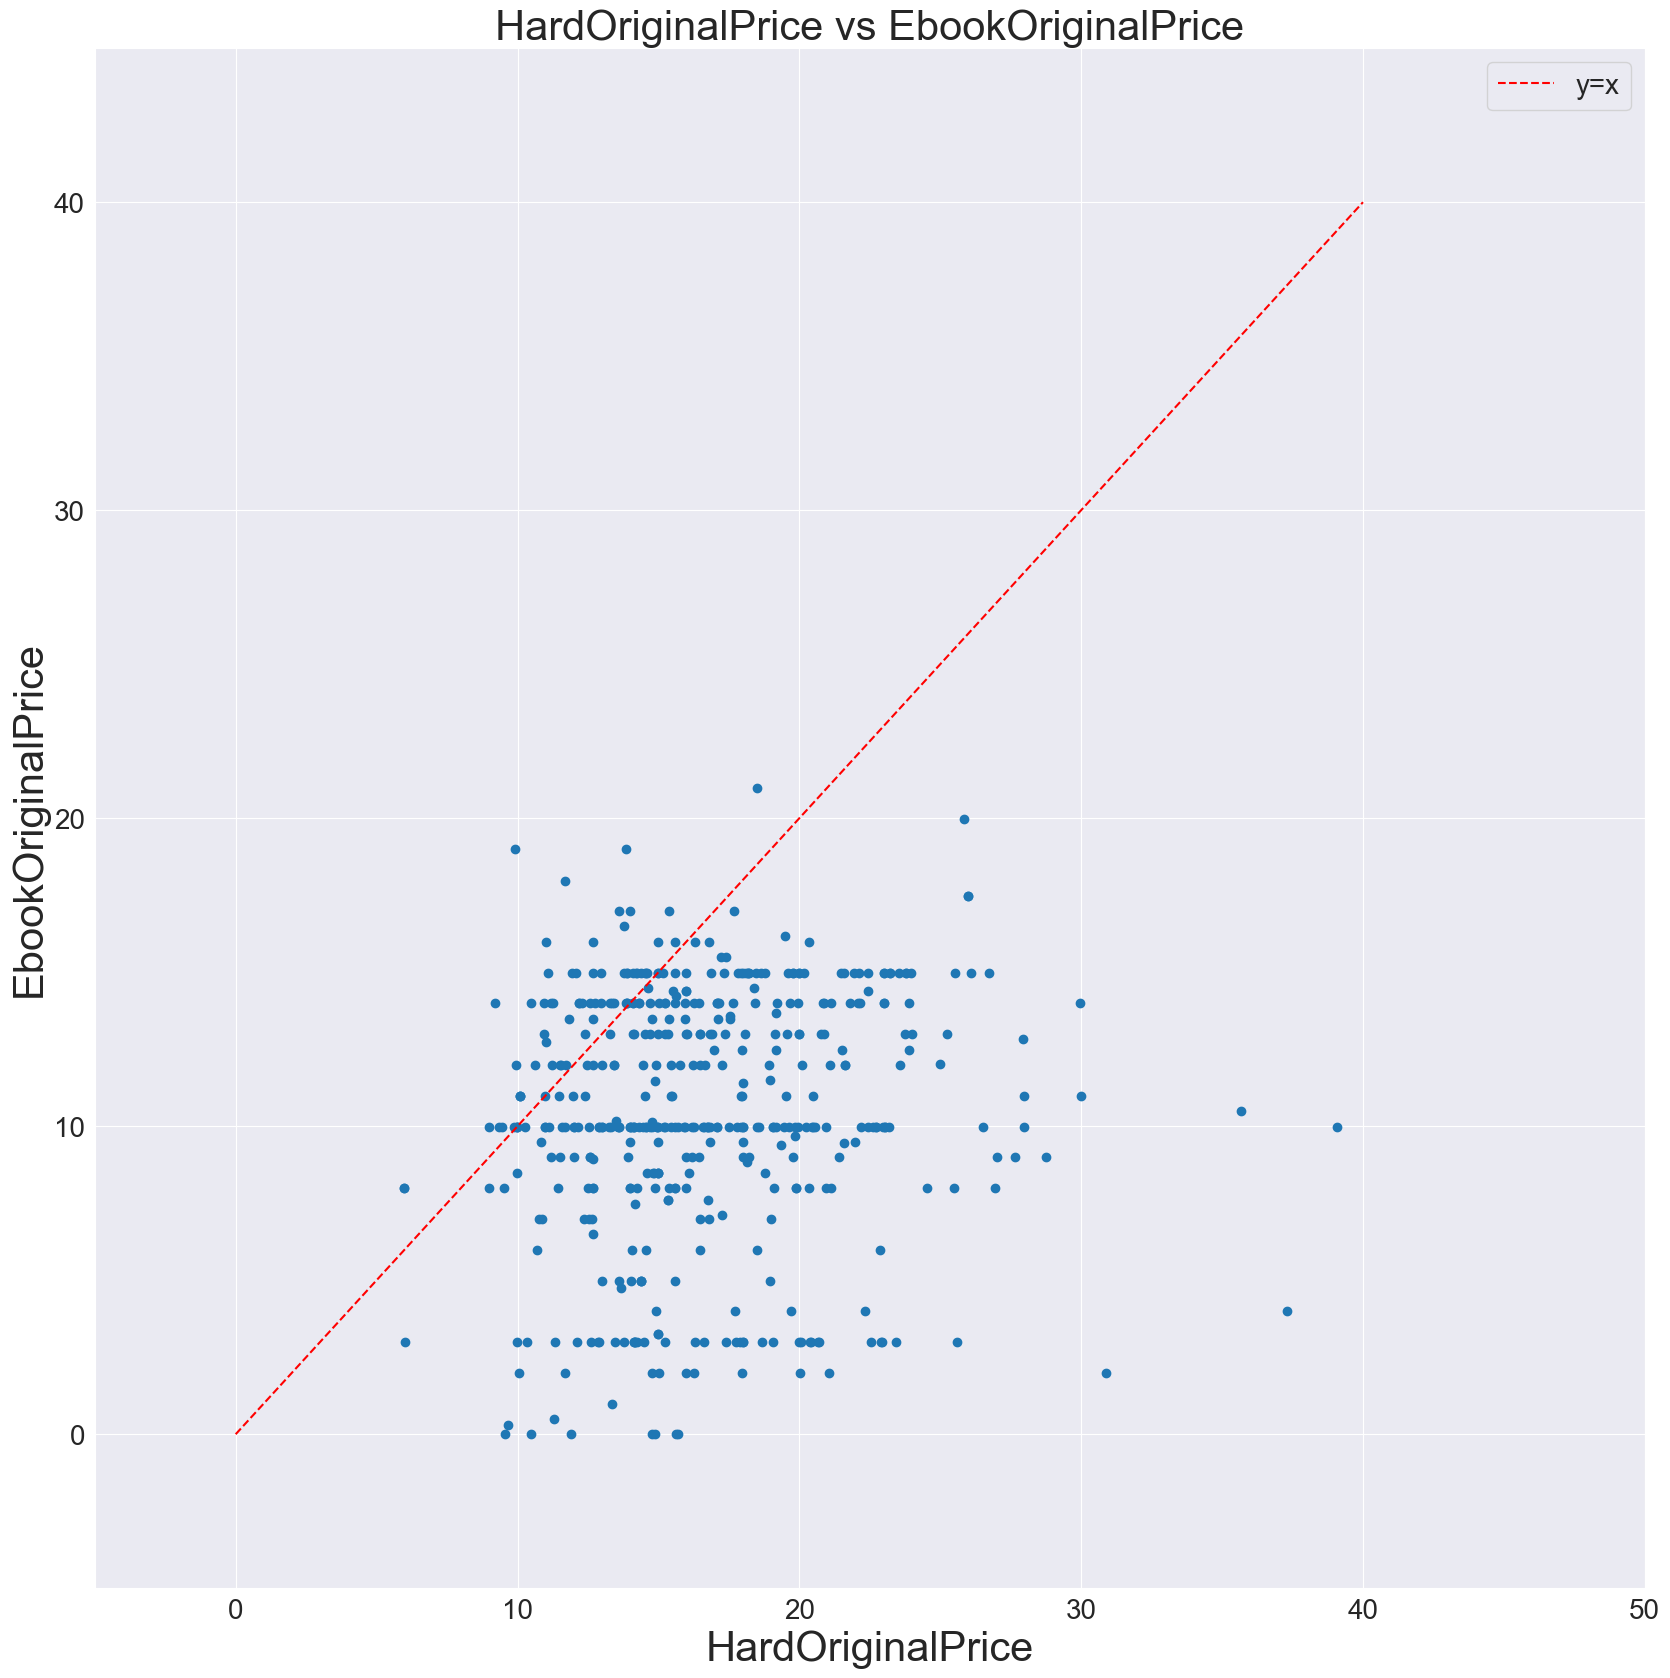

In [12]:
plt.figure(figsize=(20,20))
plt.scatter(kindledf['hardSalePrice'],kindledf['newPrice'])
plt.xlabel("HardOriginalPrice",fontsize=30)
plt.ylabel("EbookOriginalPrice",fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
x = np.linspace(0,40,100)
y = x
plt.plot(x,y,"r--",label="y=x")
plt.xlim(-5,50)
plt.ylim(-5,45)
plt.legend(fontsize = 20)
plt.title("HardOriginalPrice vs EbookOriginalPrice",fontsize=30)
plt.savefig("./pics/Harper_hard_ebook_original_price.png",dpi=300)

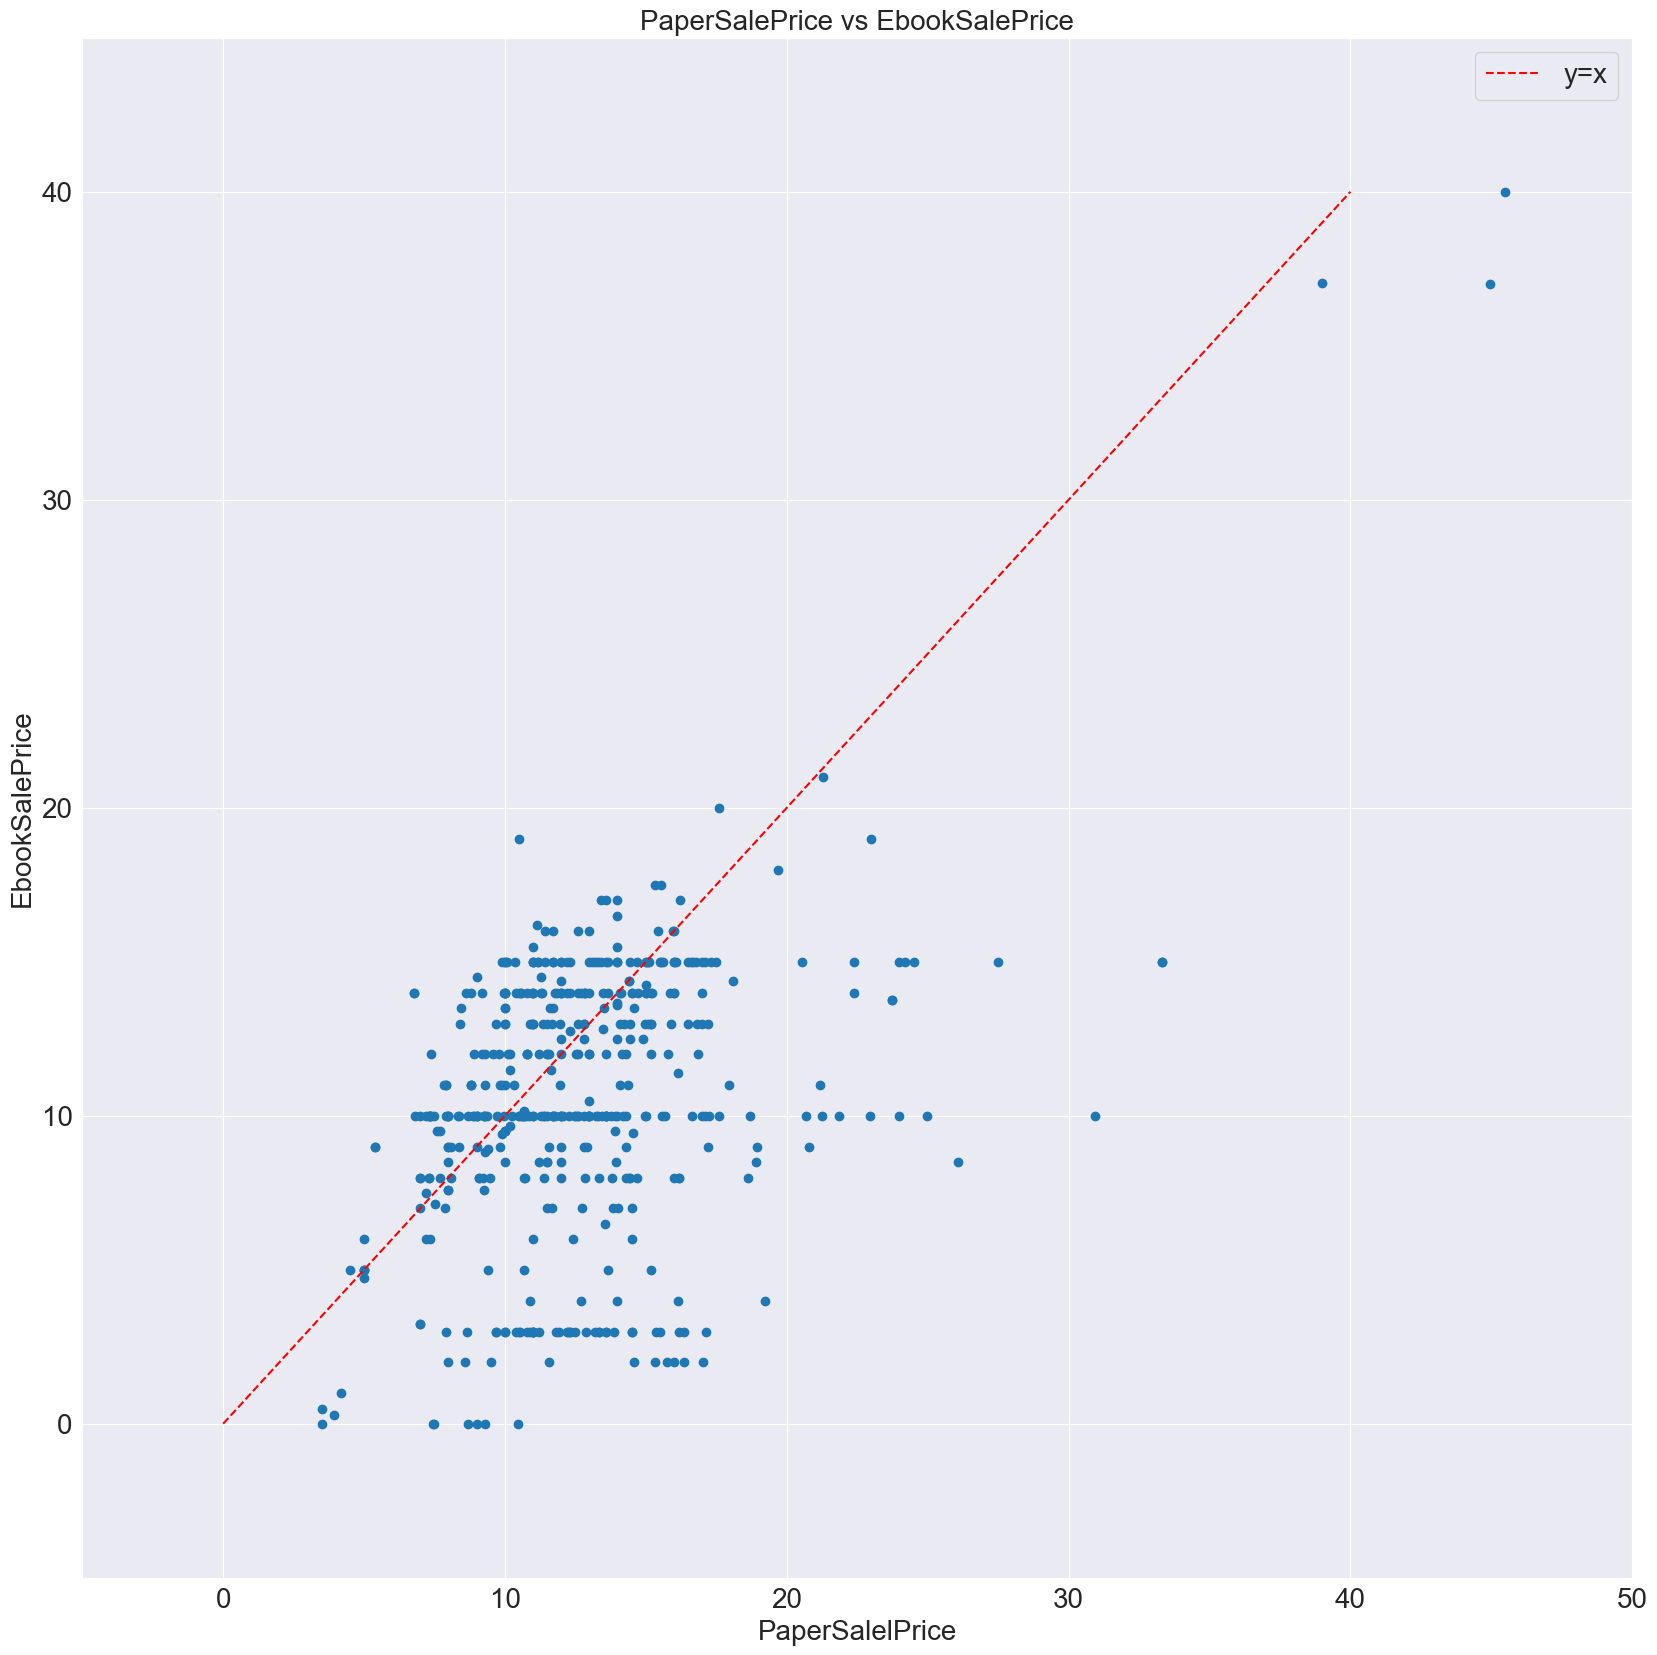

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(kindledf['paperSalePrice'],kindledf['newPrice'])
plt.xlabel("PaperSalelPrice",fontsize=20)
plt.ylabel("EbookSalePrice",fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
x = np.linspace(0,40,100)
y = x
plt.plot(x,y,"r--",label="y=x")
plt.xlim(-5,50)
plt.ylim(-5,45)
plt.legend(fontsize = 20)
plt.title("PaperSalePrice vs EbookSalePrice",fontsize=20)
plt.savefig("./pics/Harper_paper_ebook_sale_price.png",dpi=300)

In [14]:
harddf['publish_date'] = pd.to_datetime(harddf['publish_date'])
harddf = harddf[harddf['publish_date'] > '2000-01-01']
harddf = harddf[harddf['publish_date'] < '2024-06-15']
harddf.dropna(subset=['newPrice','originalPrice','discount','publish_date'],inplace=True)
harddf = harddf[harddf['newPrice'] < 60]


/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/2933327023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harddf['publish_date'] = pd.to_datetime(harddf['publish_date'])


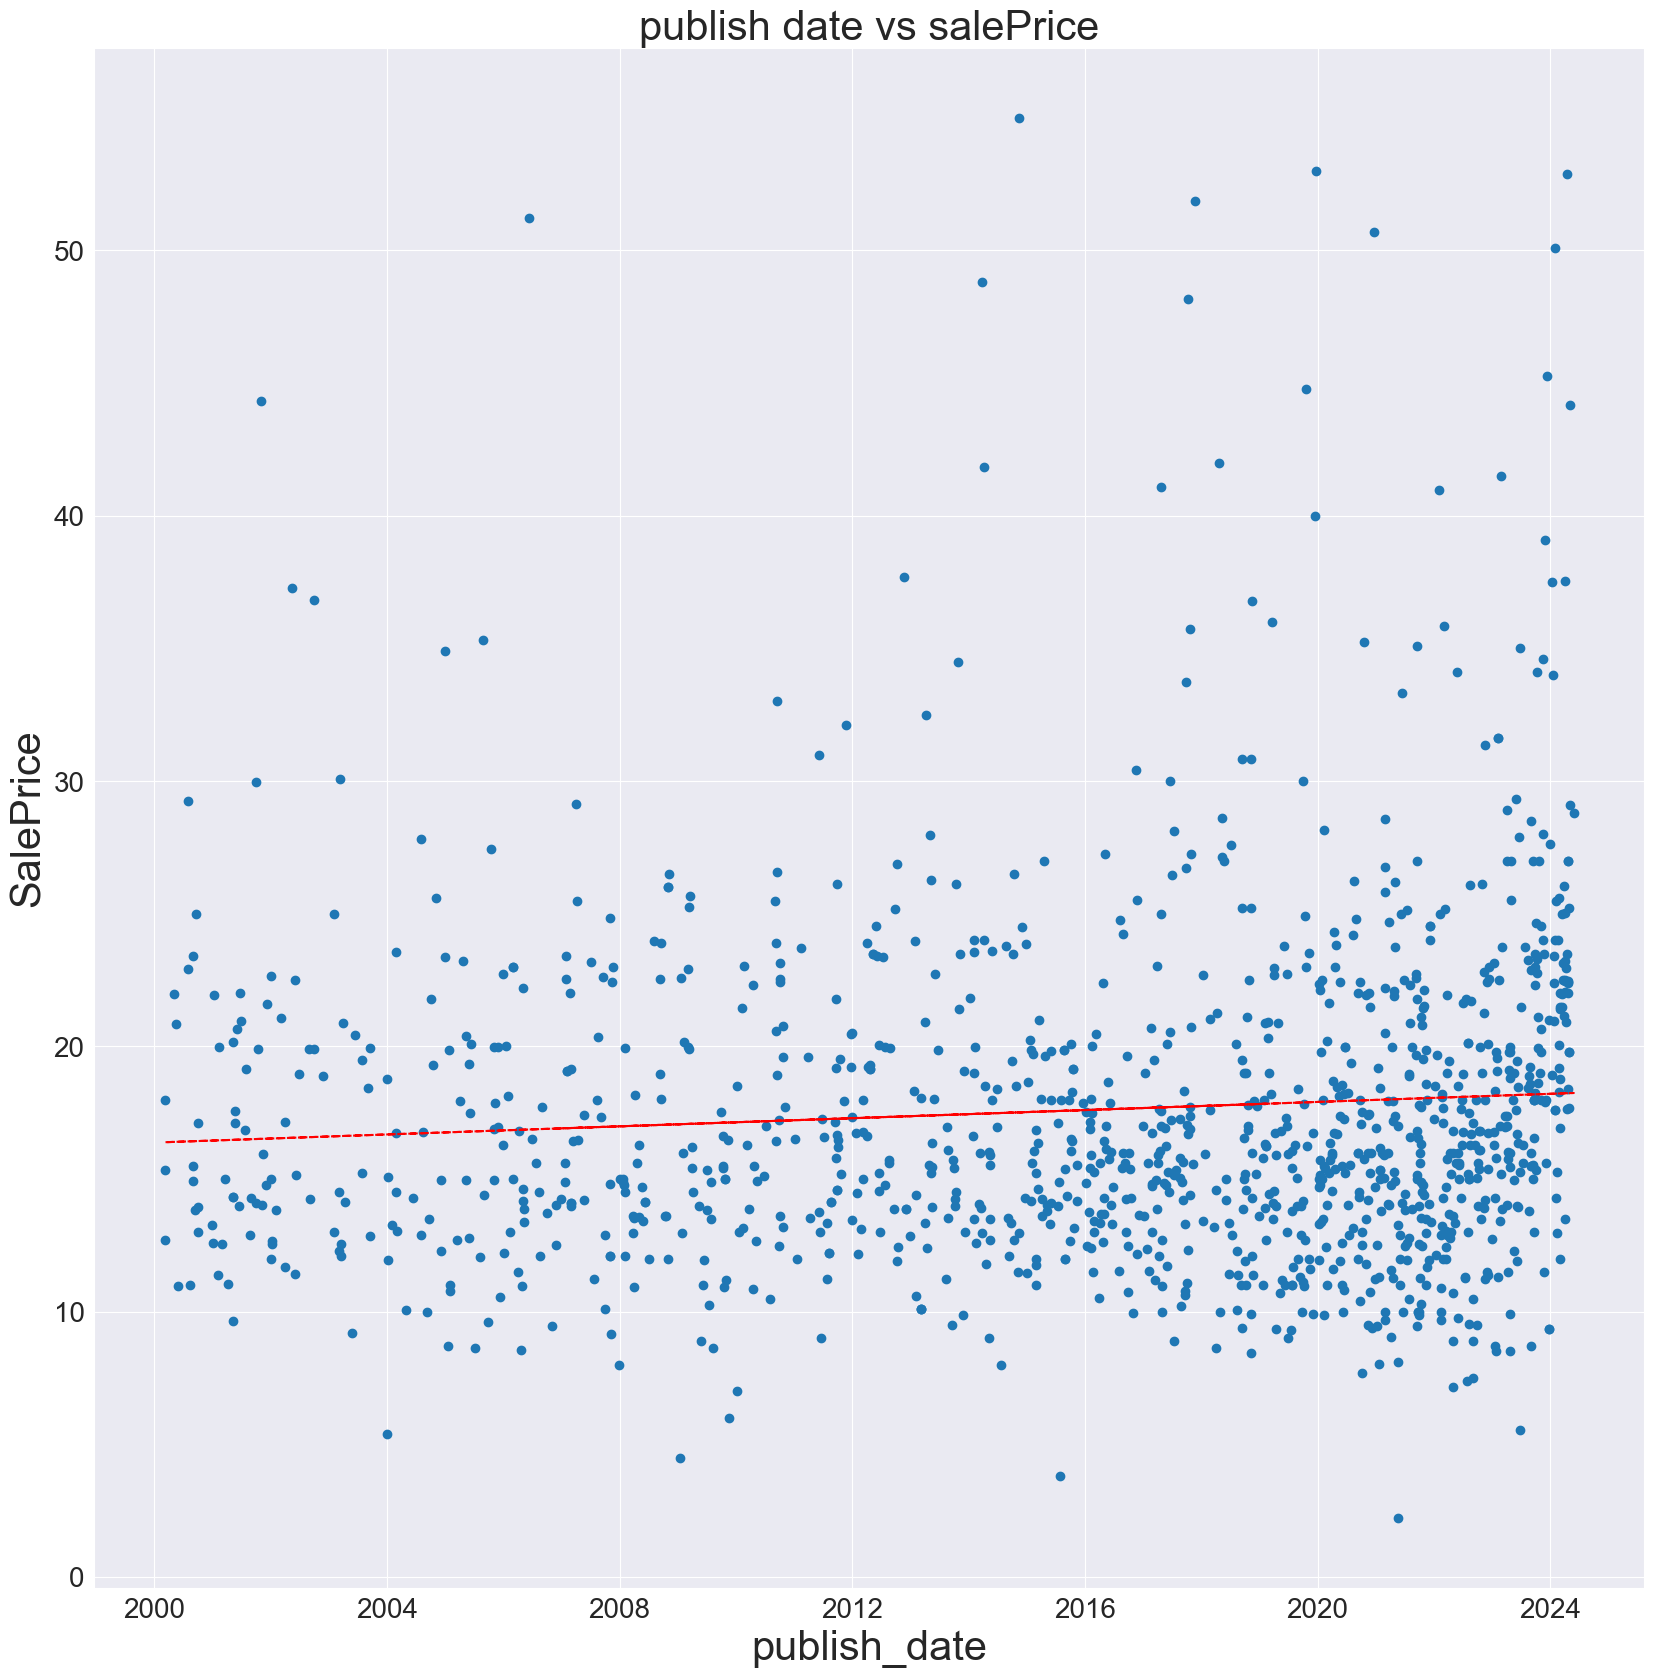

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(harddf['publish_date'],harddf['newPrice'])
plt.xlabel("publish_date",fontsize=30)
plt.ylabel("SalePrice",fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
x = mdates.date2num(harddf['publish_date'])
y = harddf['newPrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("publish date vs salePrice",fontsize=30)
plt.savefig("./pics/Harper_publishdate_hard_sale_price.png",dpi=300)

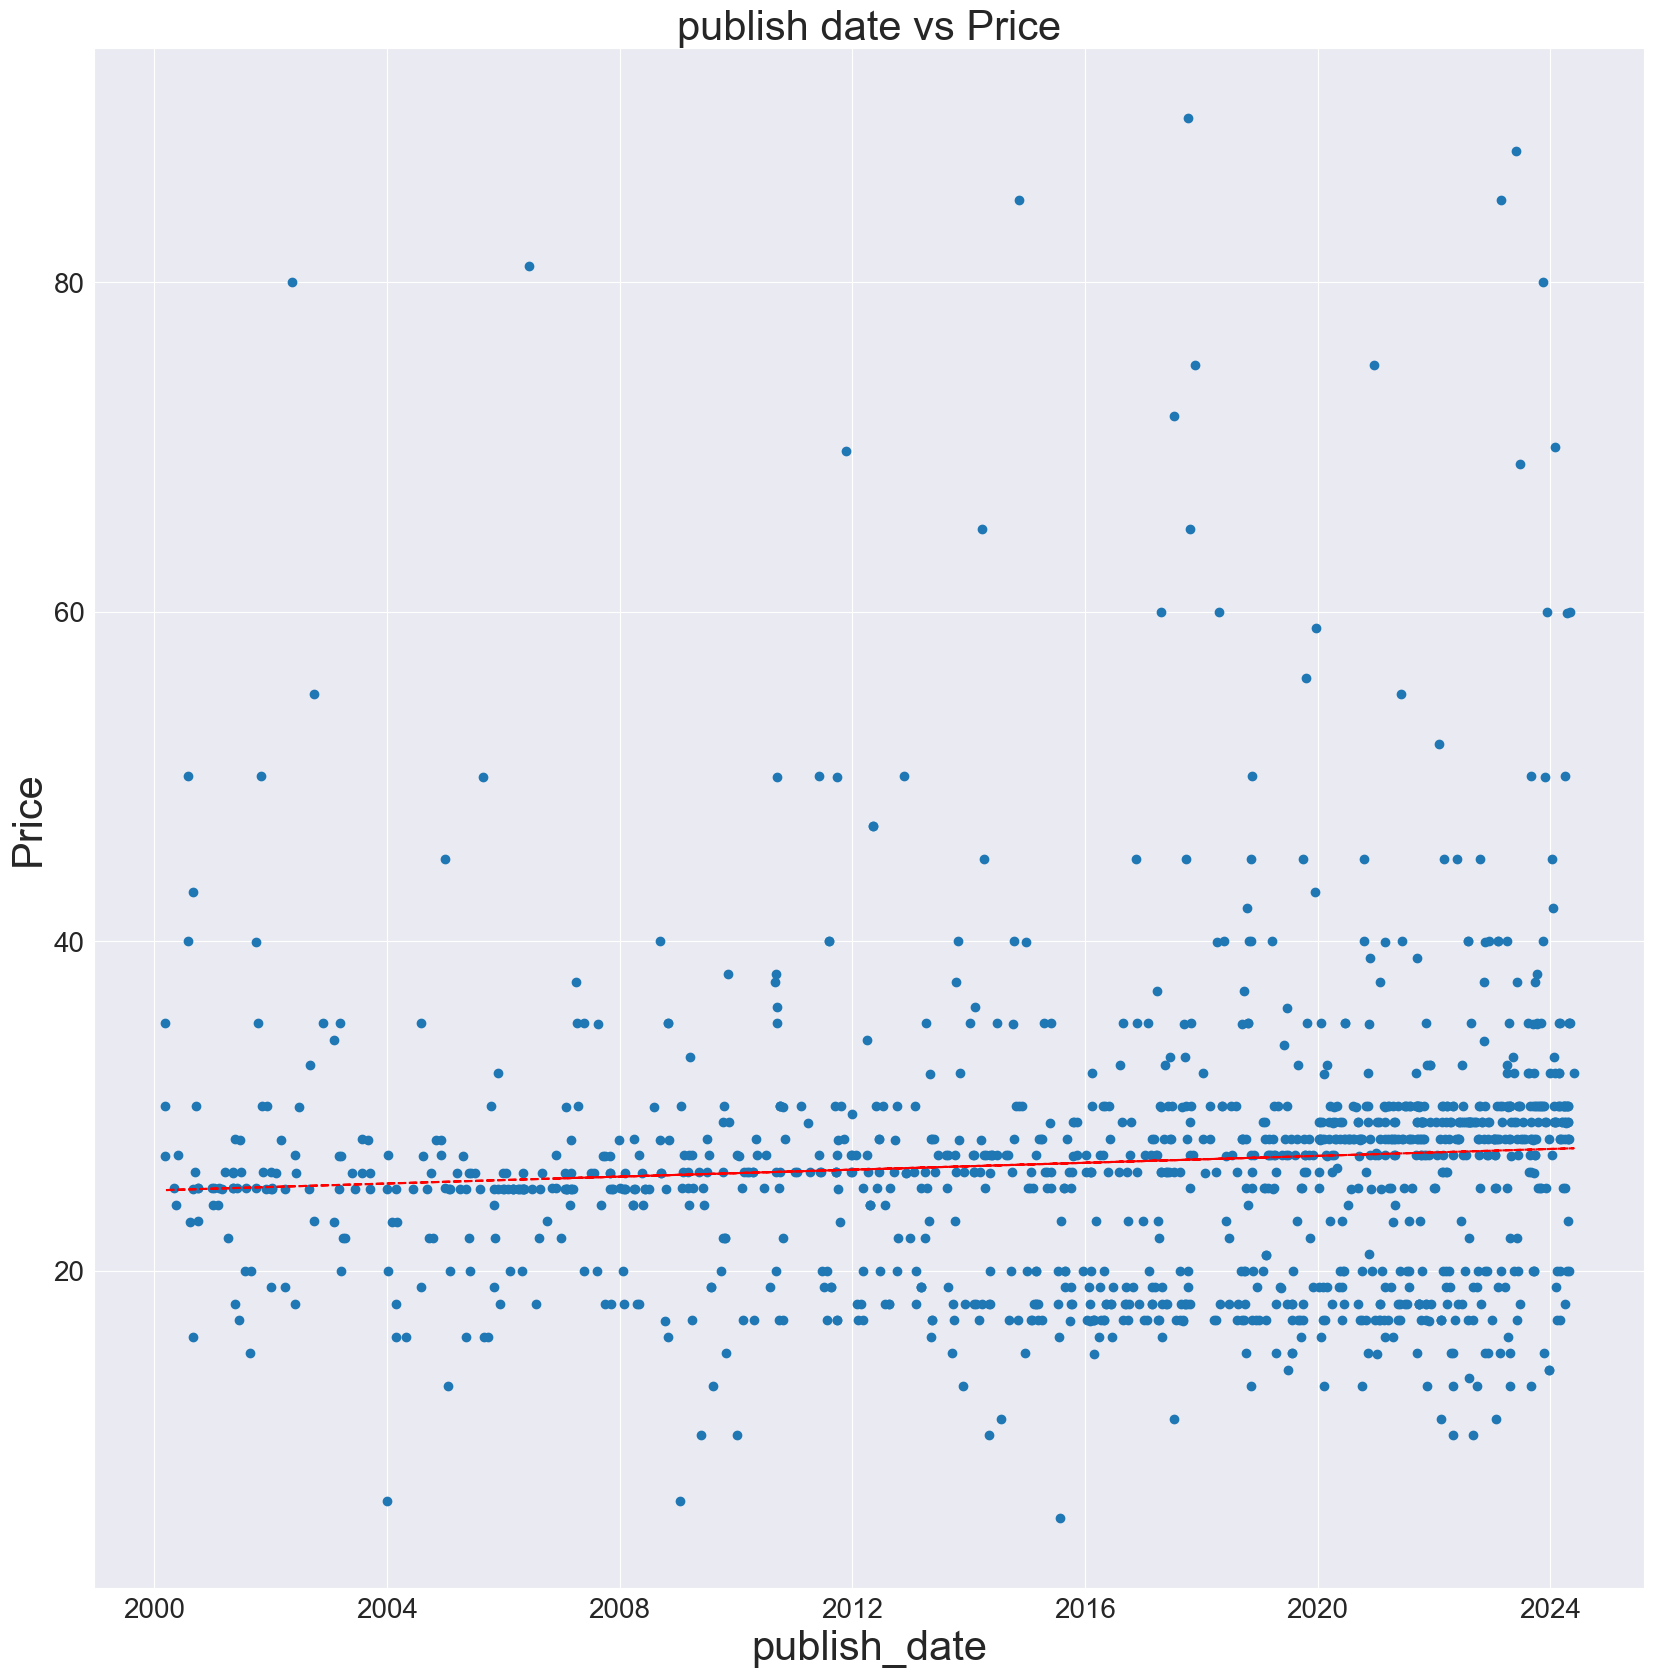

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(harddf['publish_date'],harddf['originalPrice'])
plt.xlabel("publish_date",fontsize=30)
plt.ylabel("Price",fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
x = mdates.date2num(harddf['publish_date'])
y = harddf['originalPrice']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("publish date vs Price",fontsize=30)
plt.savefig("./pics/Harper_publishdate_hard_price.png",dpi=300)

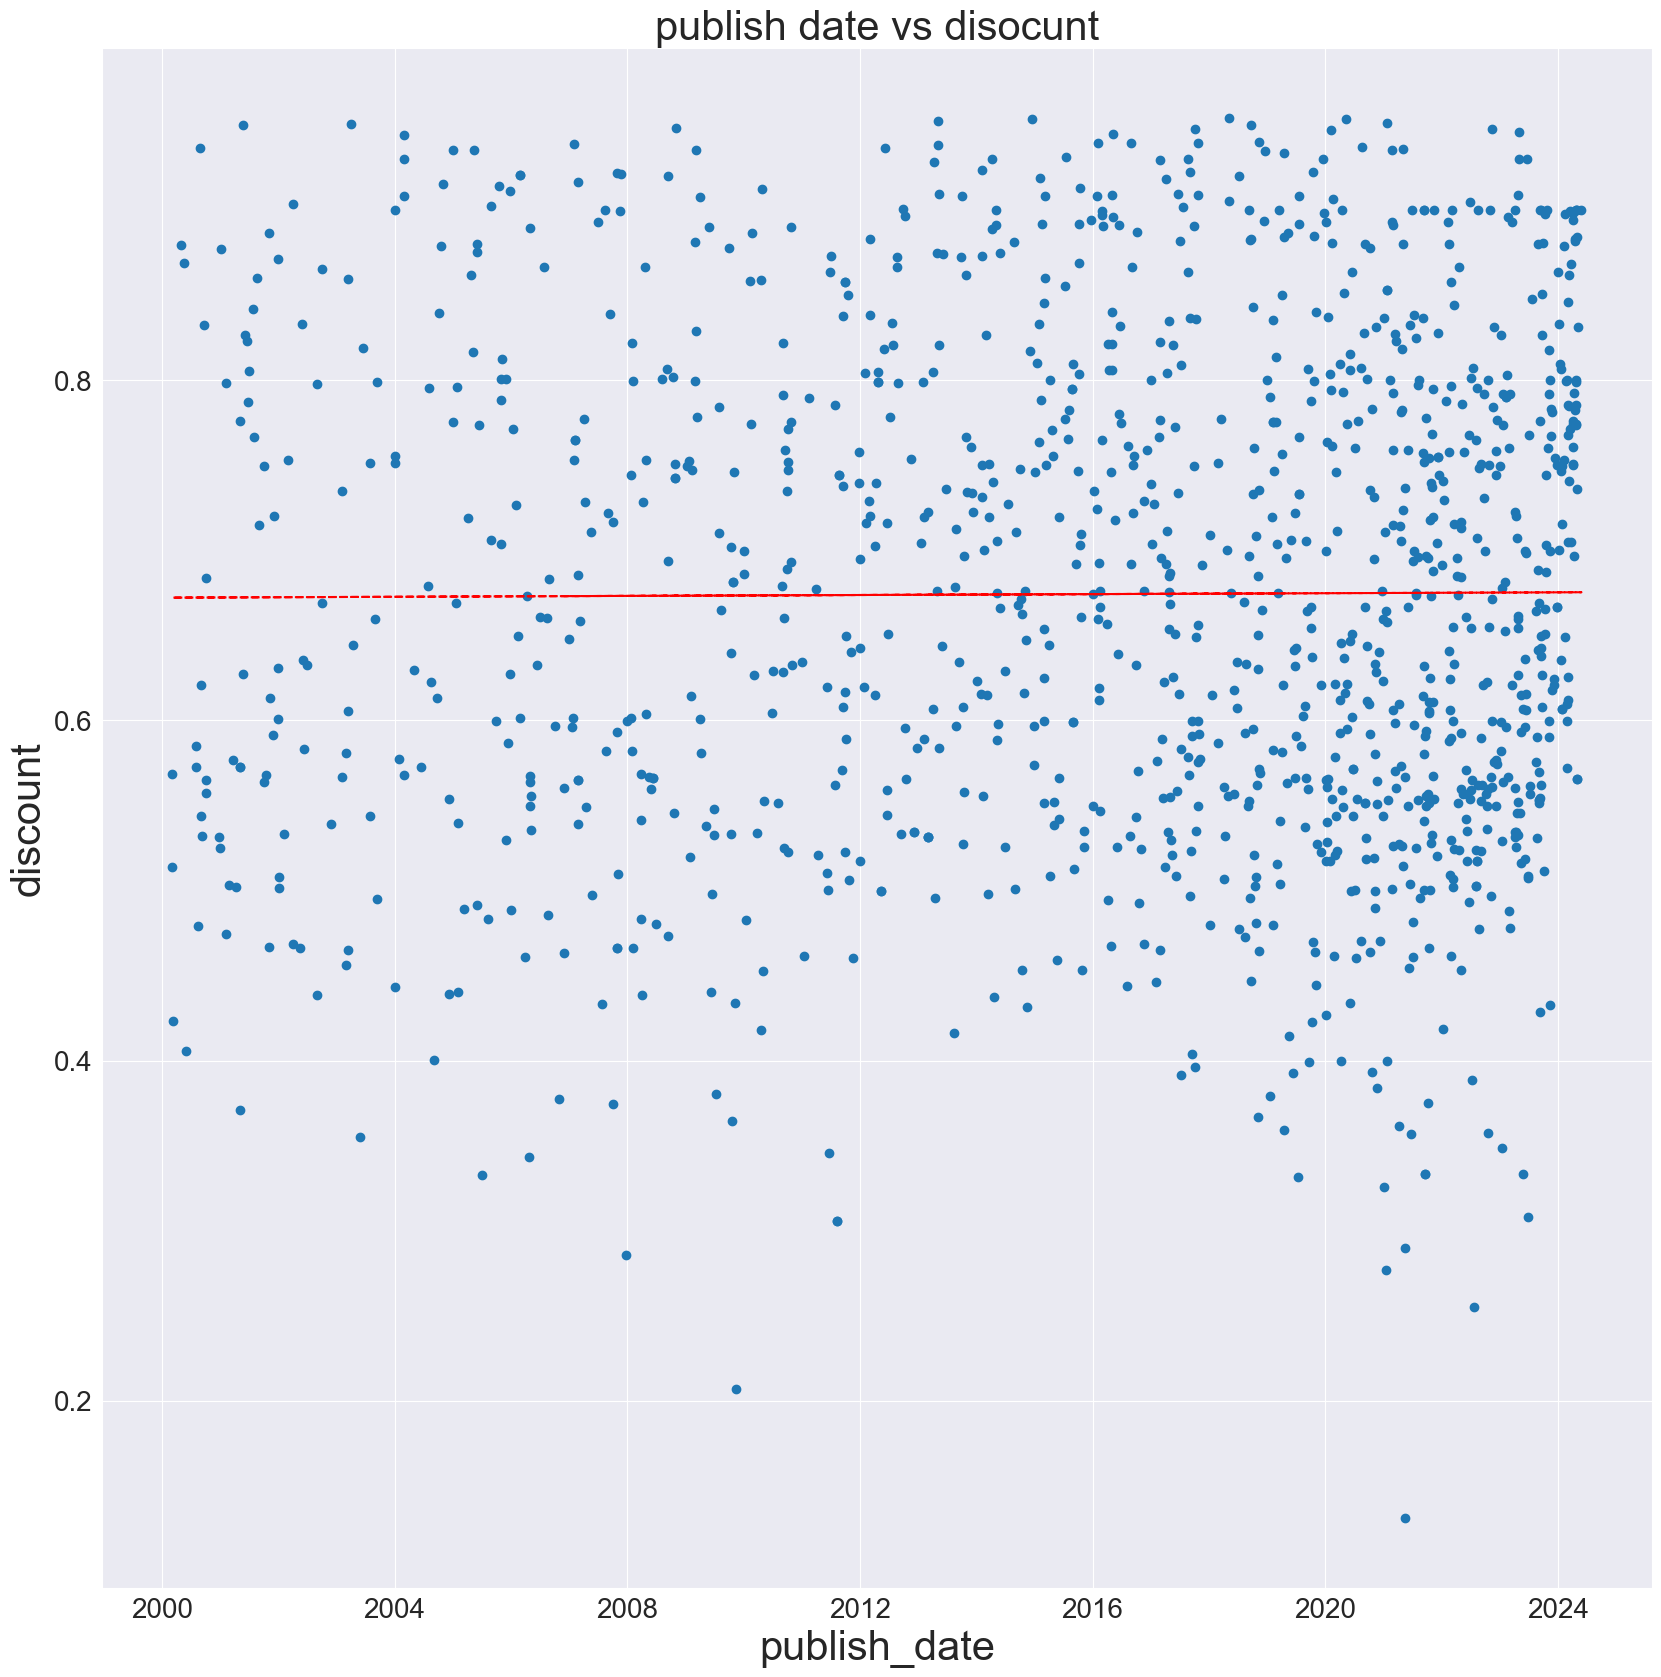

In [17]:
plt.figure(figsize=(20,20))
plt.scatter(harddf['publish_date'],harddf['discount'])
plt.xlabel("publish_date",fontsize=30)
plt.ylabel("discount",fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
x = mdates.date2num(harddf['publish_date'])
y = harddf['discount']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title("publish date vs disocunt",fontsize=30)
plt.savefig("./pics/Harper_publishdate_discount.png",dpi=300)

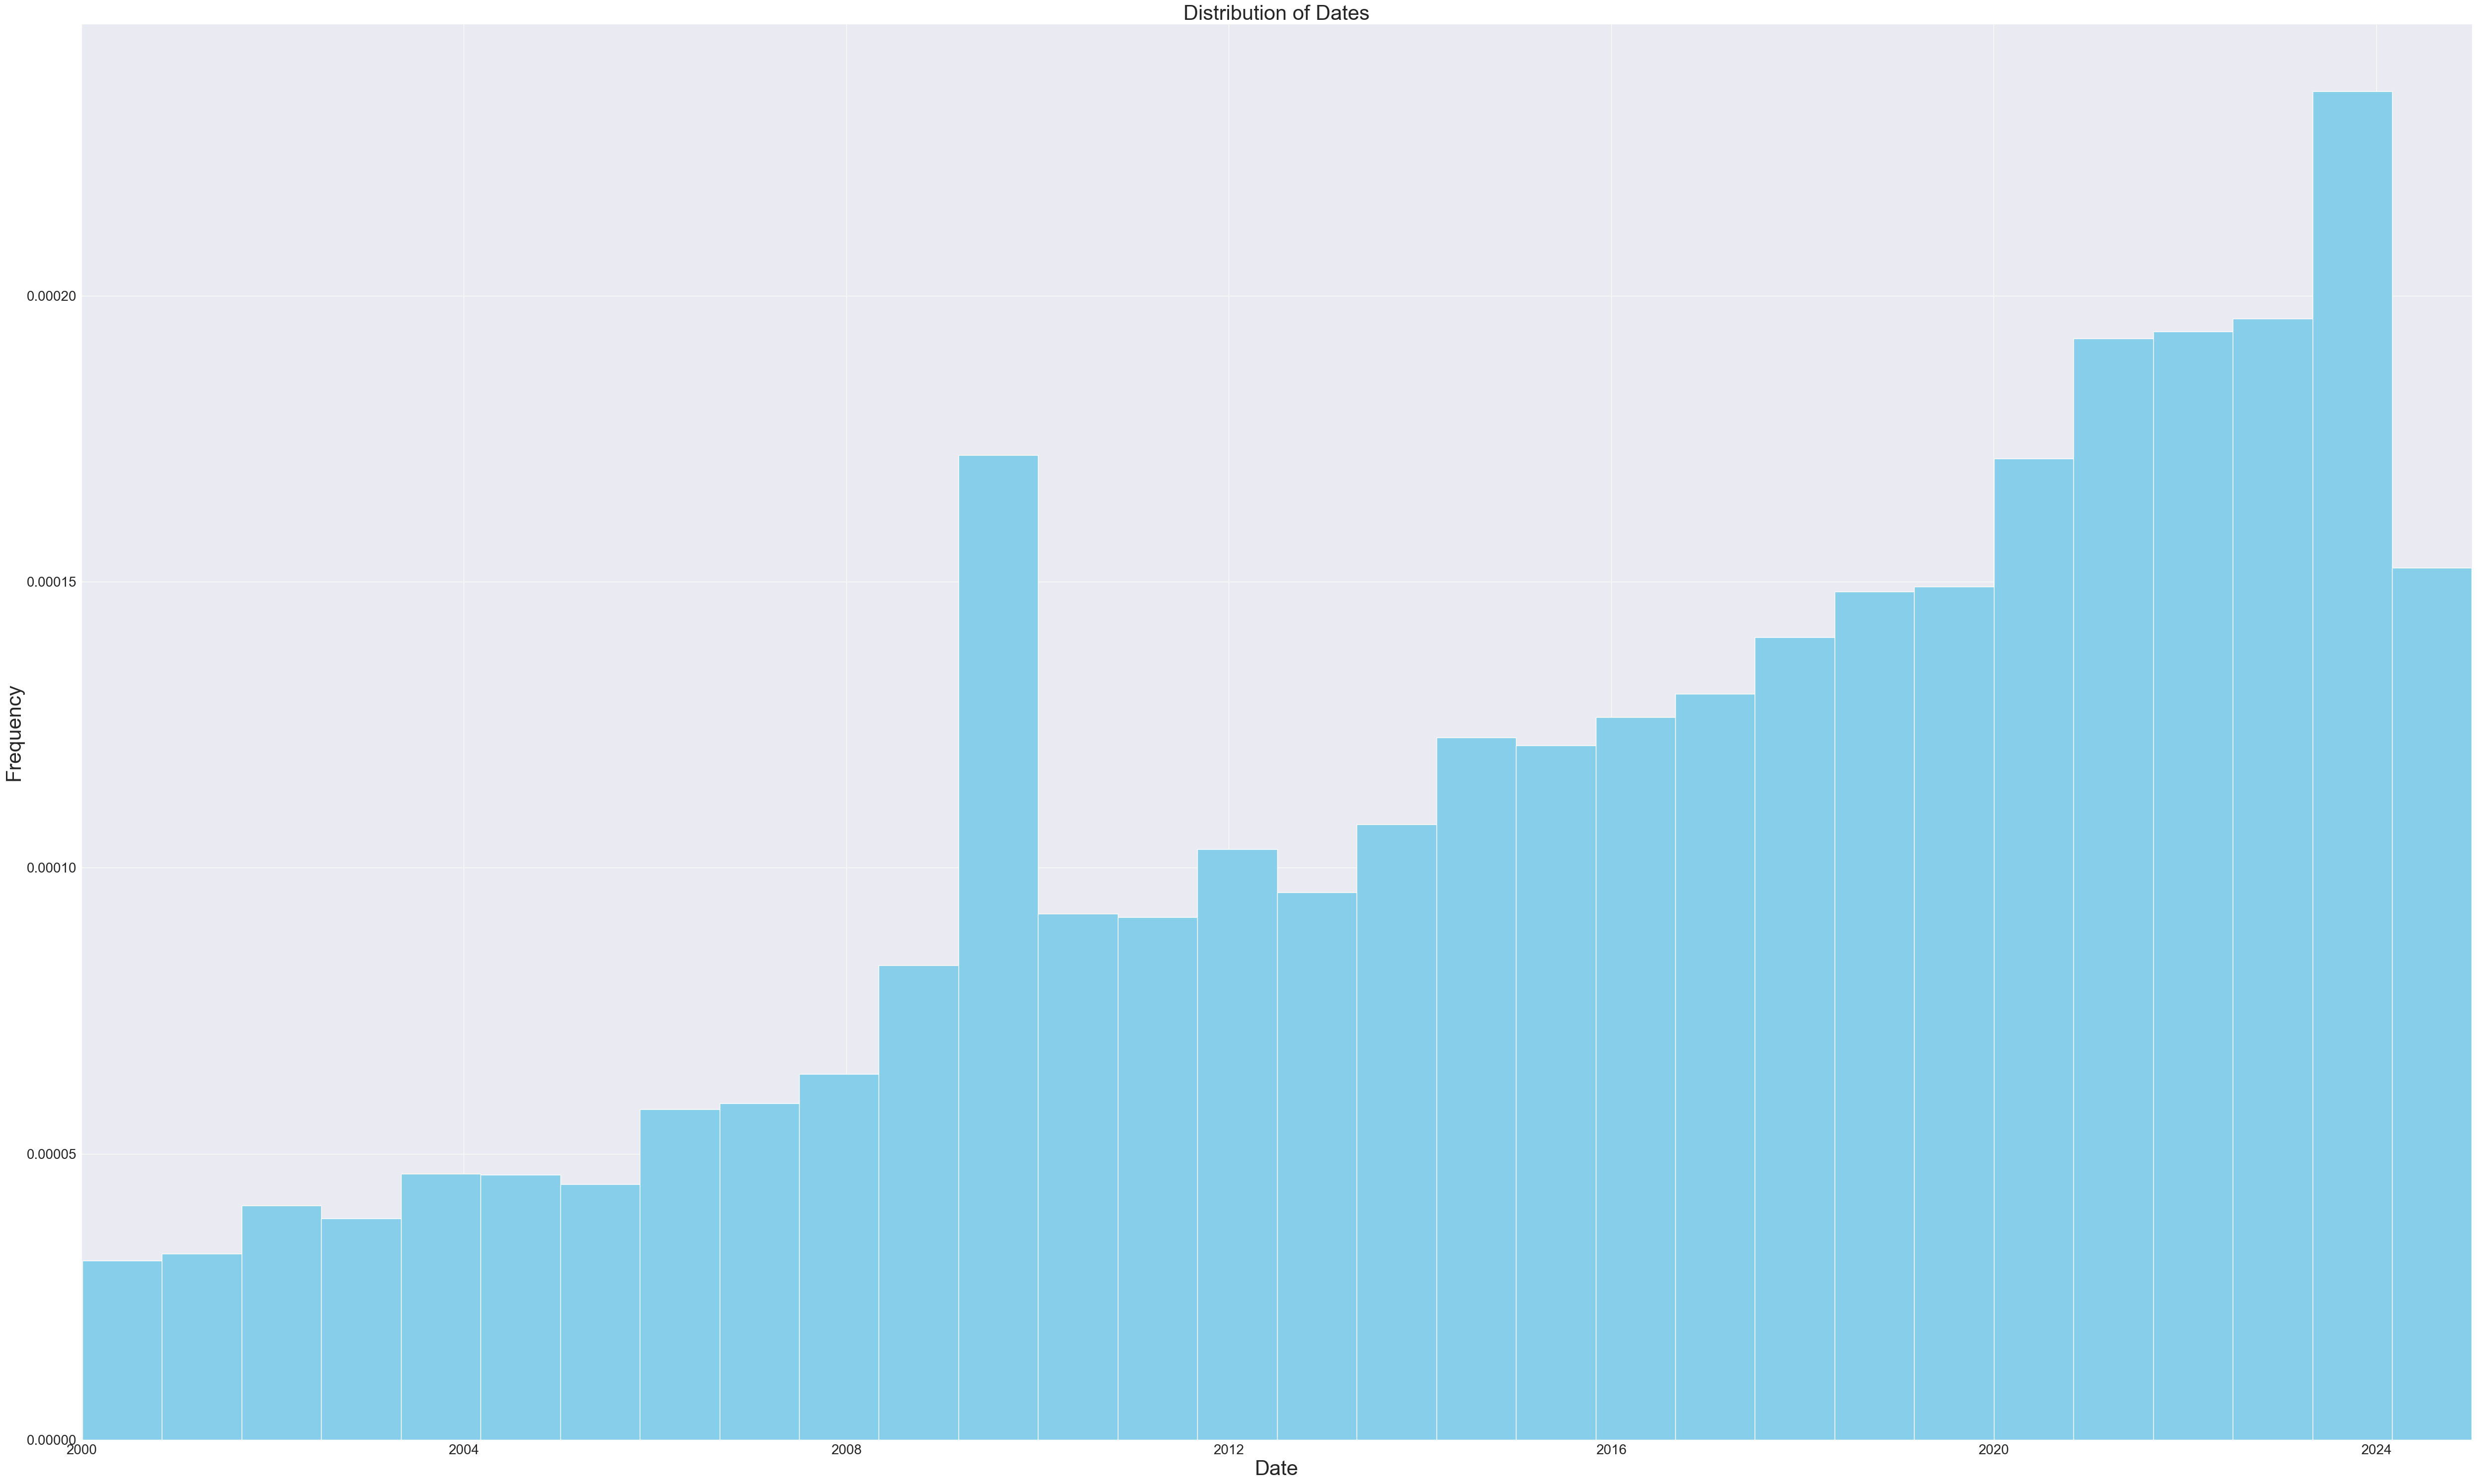

In [18]:

# Assuming 'df' is your DataFrame and 'publish_date' is the column with dates
df['publish_date'] = pd.to_datetime(df[df['publish_date']> '2000-01-01']['publish_date'])
df['publish_date'] = pd.to_datetime(df[df['publish_date']< '2025-01-01']['publish_date'])

# Convert dates to the format matplotlib understands
dates = mdates.date2num(df['publish_date'])

# Create the histogram
plt.figure(figsize=(50, 30))
plt.hist(dates, bins=30, color='skyblue',density=True)
plt.xlim([pd.to_datetime('2000-01-01'), pd.to_datetime('2025-01-01')])

# Format the x-axis to display dates properly
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotate date labels for better readability

# Set labels and title
plt.xlabel('Date',fontsize=30)
plt.ylabel('Frequency',fontsize = 30)
plt.title('Distribution of Dates',fontsize = 30)
plt.tick_params(axis='both', which='major', labelsize=20)

# Show the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.savefig("./pics/Harper_publishdate_distribution.png",dpi=300)

In [19]:
df.publisher.value_counts()

publisher
HarperCollins                             618
Independently published                   489
Collins                                   317
HarperCollins Publishers                  300
Avon                                      265
                                         ... 
Harpercollins Canada                        1
Spring Publications; 2nd edition            1
Spring Publications                         1
Bernard Geis Associates; First Edition      1
Onyx                                        1
Name: count, Length: 5930, dtype: int64

In [20]:
df.other_list

0          Publisher:Harpercollins Childrens Books (Jan...
1          ASIN:B0CFWXQ3CZ   Publisher:Poisoned Pen Pre...
2                                                        _
3          Publisher:HQ (January 18, 2024)   Language:E...
4          Publisher:Poisoned Pen Press (June 4, 2024) ...
                               ...                        
23647      Publisher:The Friday Project; Reprint editio...
23648      ASIN:B000FC1PJ8   Publisher:William Morrow P...
23649                                                    _
23650      Publisher:Dutton (February 1, 1995)   Langua...
23651      Publisher:Onyx (December 1, 1995)   Language...
Name: other_list, Length: 23652, dtype: object

/var/folders/3p/81nnp2994m19w63h0mm8m4bc0000gn/T/ipykernel_5573/2512888621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfss['publishDate'] = pd.to_datetime(pdfss['publish_date'])


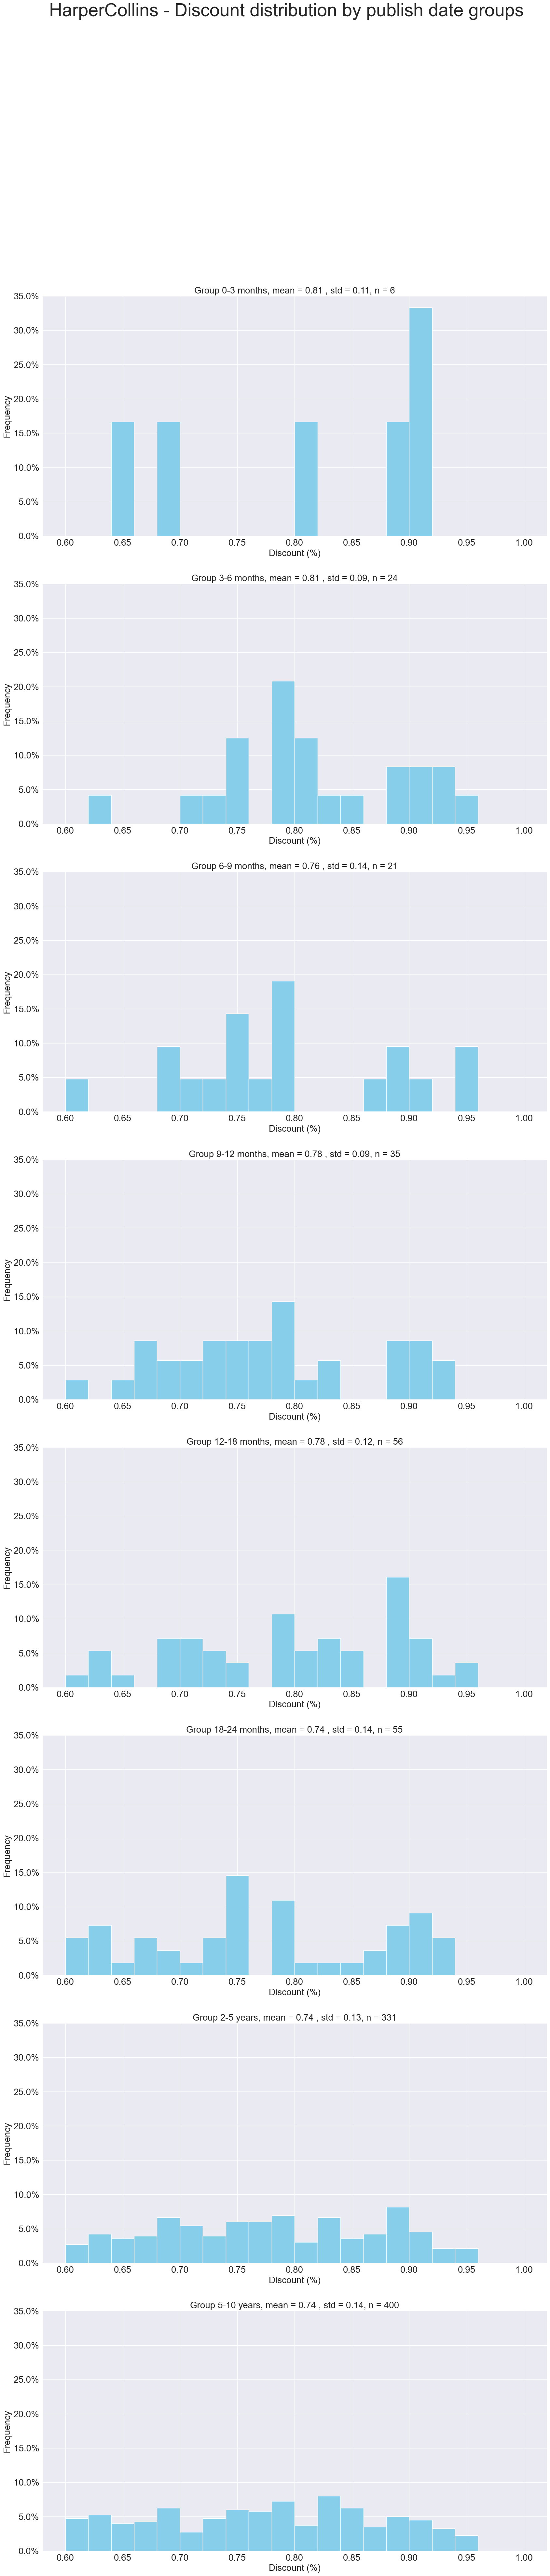

In [24]:
from matplotlib.ticker import PercentFormatter
pdfss = df
pdfss = pdfss[pdfss['format'] == 'Paperback']
pdfss['publishDate'] = pd.to_datetime(pdfss['publish_date'])
mindate = pd.to_datetime("2024-08-05")
g0 = pdfss[  mindate - pdfss['publishDate']<= pd.Timedelta(0*30,unit='d') ]
g1 = pdfss[  mindate - pdfss['publishDate']<= pd.Timedelta(3*30,unit='d') ]
g1 = g1[mindate - g1['publishDate'] > pd.Timedelta(0*30,unit='d')]
g2 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(3*30,unit='d') ]
g2 = g2[mindate - g2['publishDate'] < pd.Timedelta(6*30,unit='d')]
g3 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(6*30,unit='d') ]
g3 = g3[mindate - g3['publishDate'] < pd.Timedelta(9*30,unit='d')]
g4 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(9*30,unit='d') ]
g4 = g4[mindate - g4['publishDate'] < pd.Timedelta(12*30,unit='d')]
g5 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(12*30,unit='d') ]
g5 = g5[mindate - g5['publishDate'] < pd.Timedelta(18*30,unit='d')]
g6 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(18*30,unit='d') ]
g6 = g6[mindate - g6['publishDate'] < pd.Timedelta(24*30,unit='d')]
g7 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(24*30,unit='d') ]
g7 = g7[mindate - g7['publishDate'] < pd.Timedelta(60*30,unit='d')]
g8 = pdfss[  mindate - pdfss['publishDate']>= pd.Timedelta(60*30,unit='d') ]
g8 = g8[mindate - g8['publishDate'] < pd.Timedelta(120*30,unit='d')]

poplabels = ['popular','not popular']
boollist = [True,False]
statistics = pd.DataFrame()
labels = ['0-3 months','3-6 months','6-9 months','9-12 months','12-18 months',
          '18-24 months','2-5 years','5-10 years']

fig, ax = plt.subplots(8, 1, figsize=(20, 90), sharex=True, sharey=True)
for idx, g in enumerate([g1, g2, g3, g4, g5, g6,g7,g8]):
    g = g.dropna(subset=['discount'])
    ax[idx].hist(g['discount'], bins=20, range=(0.6, 1),weights = np.ones(len(g['discount'])) / len(g['discount']),color='skyblue')
    ax[idx].set_title('Group %s, mean = %.2f , std = %.2f, n = %d' % (labels[idx],g['discount'].mean(),g['discount'].std(),len(g['discount'])), fontsize=20)
    ax[idx].set_ylabel('Frequency', fontsize=20)
    ax[idx].set_xlabel('Discount (%)',fontsize=20)
    ax[idx].tick_params(axis='both', which='major', labelsize=20,labelbottom=True)
    ax[idx].yaxis.set_major_formatter(PercentFormatter(1))
    statistics = pd.concat([statistics,pd.Series(g.describe().discount)],axis=1)

fig.suptitle(f'HarperCollins - Discount distribution by publish date groups',fontsize= 40)
plt.savefig(f"./pics/Discount_by_publish_date_harpercollins.png")

In [22]:
g1

,all_rank_list,format,before_discount,new_price,title,title_search_result,scrape_time,other_list,originalPrice,newPrice,discount,allRank,publish_date,publisher,publishDate
4,"#59,828",Paperback,_,from $16.99,Queen of Poisons,The Queen of Poisons: A Novel (The Marlow Mu...,2024-04-30 04:30:28.240151,"Publisher:Poisoned Pen Press (June 4, 2024) ...",NaN,16.99,NaN,59828.0,2024-06-04,Poisoned Pen Press,2024-06-04
615,"#390,868",Paperback,_,$18.99,Cover for Murder,A Cover for Murder: Escape into a bookish wo...,2024-04-30 06:55:53.973433,"Publisher:Avon (June 25, 2024) Language:En...",NaN,18.99,NaN,390868.0,2024-06-25,Avon,2024-06-25
982,"#2,181,336",Paperback,_,$5.99,Makeda Makes a Home for Subway,Makeda Makes a Home for Subway (I Can Read L...,2024-04-30 08:14:05.194233,"Publisher:Balzer + Bray (June 18, 2024) La...",NaN,5.99,NaN,2181336.0,2024-06-18,Balzer + Bray,2024-06-18
1002,"#4,725,621",Paperback,_,$22.99,El cÃ³digo rosa,El cÃ³digo rosa (Spanish Edition),2024-04-30 08:19:24.519767,Publisher:HarperCollins; 1st edition (June 1...,NaN,22.99,NaN,4725621.0,2024-06-11,HarperCollins; 1st edition,2024-06-11
1037,"#4,725,621",Paperback,_,$22.99,El cÃ³digo Rosa,El cÃ³digo rosa (Spanish Edition),2024-04-30 08:26:30.483501,Publisher:HarperCollins; 1st edition (June 1...,NaN,22.99,NaN,4725621.0,2024-06-11,HarperCollins; 1st edition,2024-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21365,NaN,Paperback,_,$21.99,Trincheras de Cable (Switchboard Soldiers - Sp...,Trincheras de cable. Ellas tambiÃ©n ganaron ...,2024-05-03 14:49:03.083295,Publisher:HarperCollins; 1st edition (June 1...,NaN,21.99,NaN,NaN,2024-06-11,HarperCollins; 1st edition,2024-06-11
21692,NaN,Paperback,_,$25.44,Untitled Book 2,Untitled book 2,2024-05-03 15:56:21.527551,"Publisher:Scribner UK (June 1, 2024) Langu...",NaN,25.44,NaN,NaN,2024-06-01,Scribner UK,2024-06-01
21773,NaN,Paperback,_,$50.00,White sands,Brandon Sanderson's White Sand Omnibus,2024-05-03 16:12:32.143760,"Publisher:Dynamite Entertainment (June 11, 2...",NaN,50.00,NaN,NaN,2024-06-11,Dynamite Entertainment,2024-06-11
21803,"#2,371,422",Paperback,_,from $18.99,"Nice Work, Nora November","Nice Work, Nora November",2024-05-03 16:18:14.775045,"Publisher:Harper Muse (June 4, 2024) Langu...",NaN,18.99,NaN,2371422.0,2024-06-04,Harper Muse,2024-06-04
